In [79]:
#pip install seaborn
#!pip install openpyxl



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
df_threats = pd.read_csv('Desktop/eurepoc_global_dataset_1_3_final.csv', parse_dates=True)

In [32]:
df_threats_s = df_threats.sort_values(by="Start date", ascending=True)
df_threats_s = df_threats_s.rename(columns={"Industry": "Category"})
df_threats_s.head()

,Start date,Incident type,Receiver country,Category,Initiator country,Political responses,MITRE Impact,Intelligence impact,International Law Breach Indicator
1129,01.01.2015,Data theft,China,Ethnic,China,0,Data Exfiltration,5,Human rights
1041,01.01.2015,Data theft,United Kingdom,Advocacy,Russia,1,Data Exfiltration,2,Cyber espionage
1128,01.01.2015,Data theft,China,Ethnic,China,0,Data Exfiltration,2,Cyber espionage
839,01.01.2016,Data theft,Ukraine,Other,Ukraine,0,Data Exfiltration,2,Human rights
573,01.01.2017,Data theft,Netherlands,Critical Manufacturing,China,0,Data Exfiltration,3,Due diligence


In [62]:
industry_mapping = {
    "Food": "Other",
    "Finance;Finance": "Finance",
    "Ethnic": "Other",
    "Religious": "Other",
    "Water": "Critical Manufacturing",
    "Intelligence agencies": "Military",
    "Defence industry": "Military",
    "Election infrastructure":"Government",
    "Health":"Critical Manufacturing",
    "Health;Health":"Critical Manufacturing",
    "Energy": "Critical Manufacturing",
    "Advocacy":"Government",
    "Criminal":"Crime",
    "Waste Water Management": "Critical Manufacturing",
    "Telecommunication": "Critical Manufacturing",
    "Transportation": "Critical Manufacturing",
    "Chemicals": "Critical Manufacturing",
    "Government": "Government and Research",
    "Research": "Government and Research"
}

# Replace values in column
df_threats_s['Category'] = df_threats_s['Category'].replace(industry_mapping)

In [47]:
df_threats_s = df_threats_s.reset_index(drop=True)
df_threats_s 
"""
wchich sector is the most volnerubale sect
polit responses by impact"""

' amount sector per yeAR\nTYPE PER INSICEDT IMPACT \nwchich sector is the most volnerubale sect\npolit responses by impact'

## 1. Incidents Over Time

In [48]:
#opis

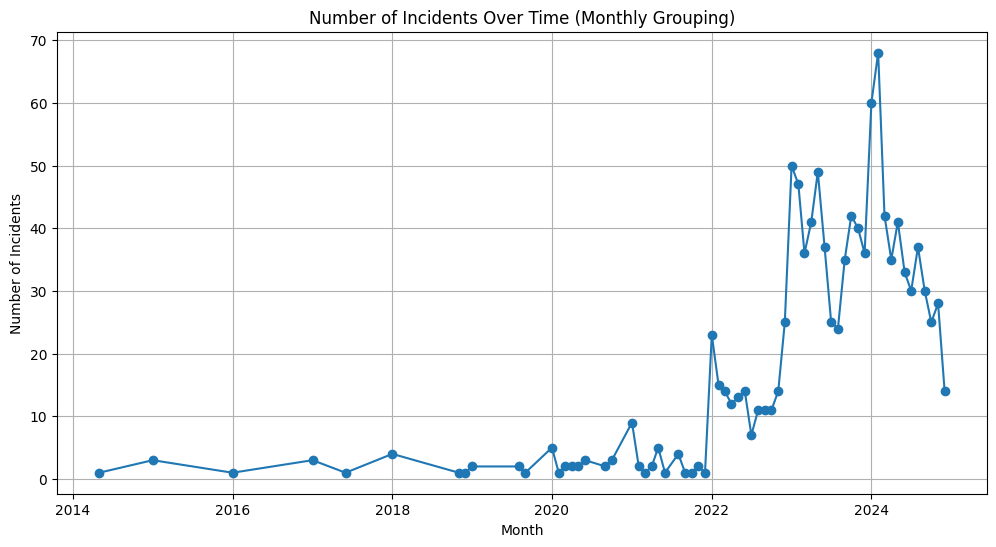

In [49]:
df_threats_s["Start date"] = pd.to_datetime(df_threats_s["Start date"], format="%d.%m.%Y")
incidents_per_month = df_threats_s.groupby(df_threats_s["Start date"].dt.to_period("M")).size()
incidents_per_month.index = incidents_per_month.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(incidents_per_month.index, incidents_per_month.values, marker="o")
plt.title("Number of Incidents Over Time (Monthly Grouping)")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.show()

## 2. Who Attacks Whom (Heatmap)

In [50]:
# opis

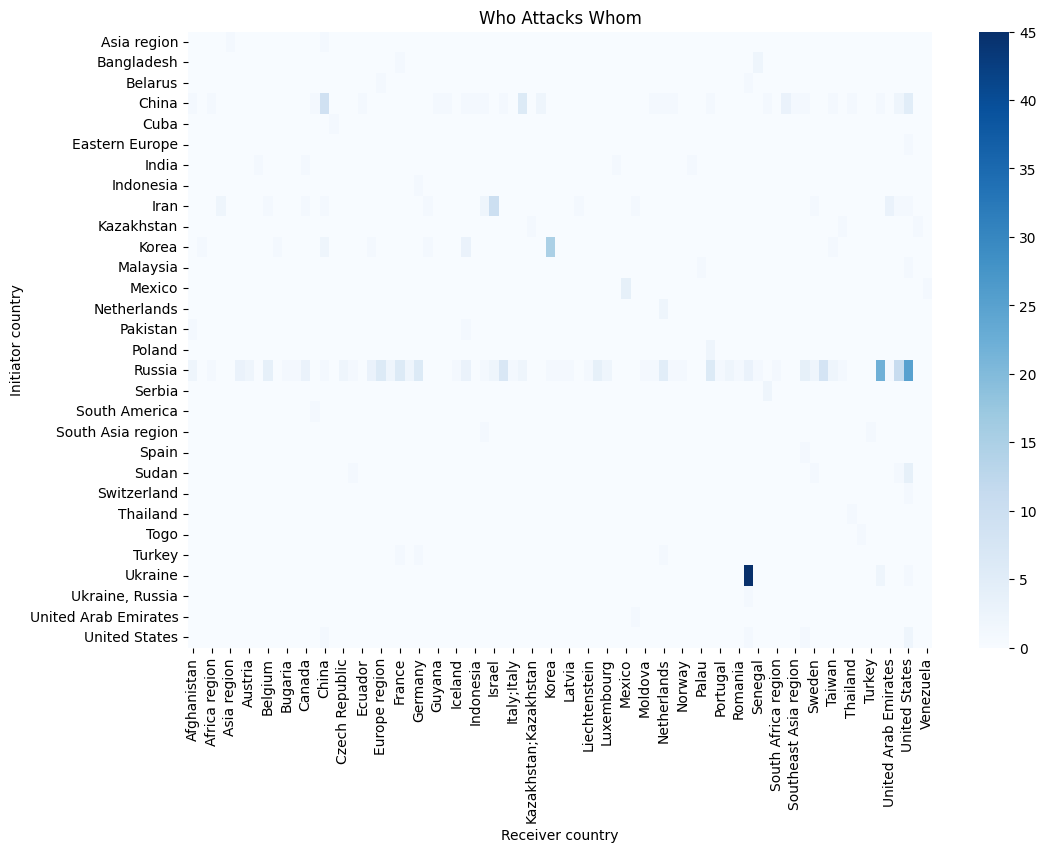

In [51]:
df_filtered = df_threats[(df_threats["Initiator country"] != "Unknown") & 
                         (df_threats["Receiver country"] != "Unknown")]

attacks = df_filtered.pivot_table(index="Initiator country", 
                                 columns="Receiver country", 
                                 values="Incident type", 
                                 aggfunc="count", 
                                 fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(attacks, cmap="Blues", annot=False)
plt.title("Who Attacks Whom")
plt.show()

4.

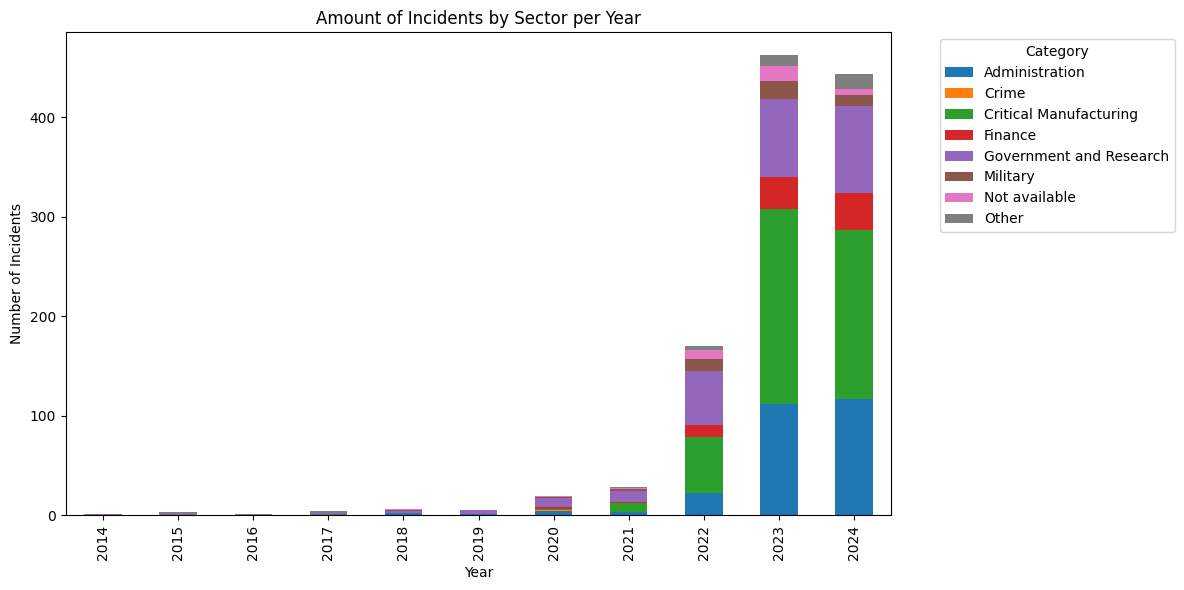

In [63]:

df_threats_s['Year'] = df_threats_s['Start date'].dt.year
incidents_by_sector_year = df_threats_s.groupby(['Year', 'Category'])['Incident type'].count().unstack(fill_value=0)


incidents_by_sector_year.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Amount of Incidents by Sector per Year")
plt.ylabel("Number of Incidents")
plt.xlabel("Year")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 3. Category vs Intelligence Impact

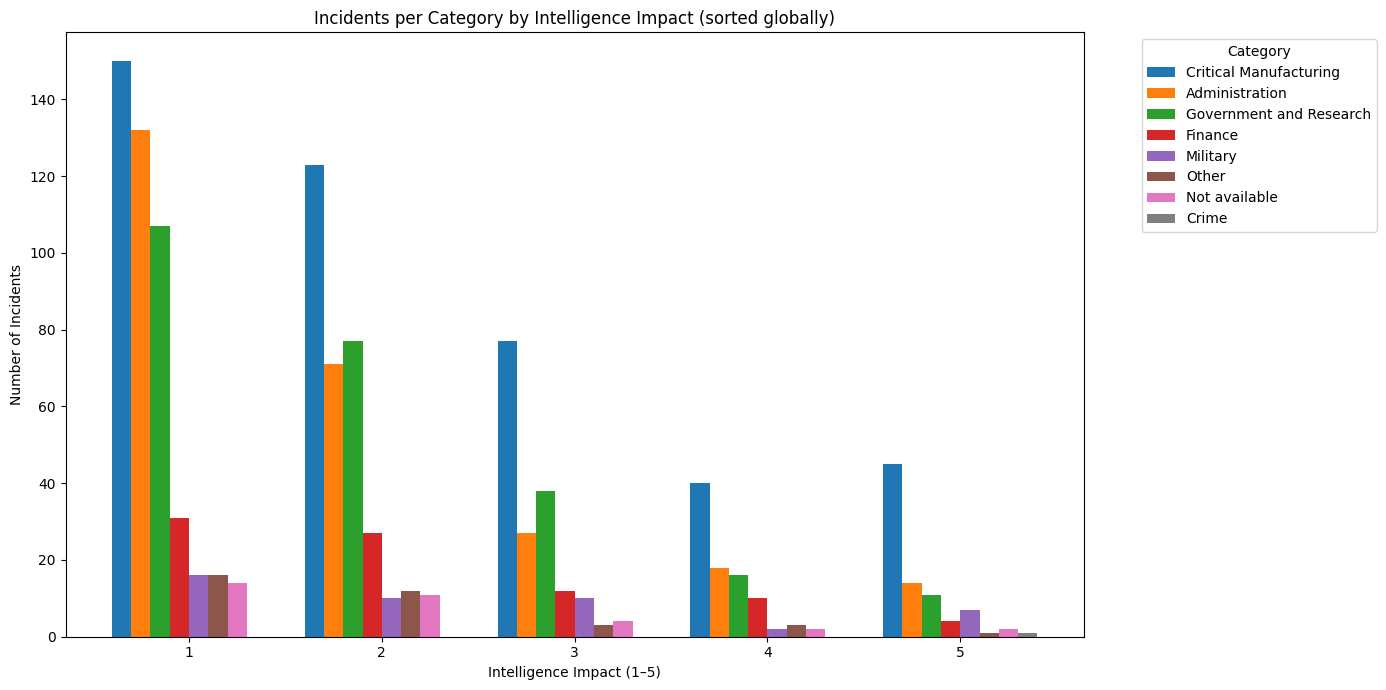

In [71]:

impact_counts = df_threats_s.groupby(["Intelligence impact", "Category"])["Incident type"].count().unstack(fill_value=0)
impact_counts = impact_counts[impact_counts.sum(axis=0).sort_values(ascending=False).index]

x = np.arange(len(impact_counts.index))  
width = 0.8 / len(impact_counts.columns)  

plt.figure(figsize=(14,7))
for i, category in enumerate(impact_counts.columns):
    plt.bar(x + i*width, impact_counts[category], width=width, label=category)

plt.xticks(x + width*(len(impact_counts.columns)-1)/2, impact_counts.index)
plt.xlabel("Intelligence Impact (1–5)")
plt.ylabel("Number of Incidents")
plt.title("Incidents per Category by Intelligence Impact (sorted globally)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Most vulnerable sector (by number of incidents)

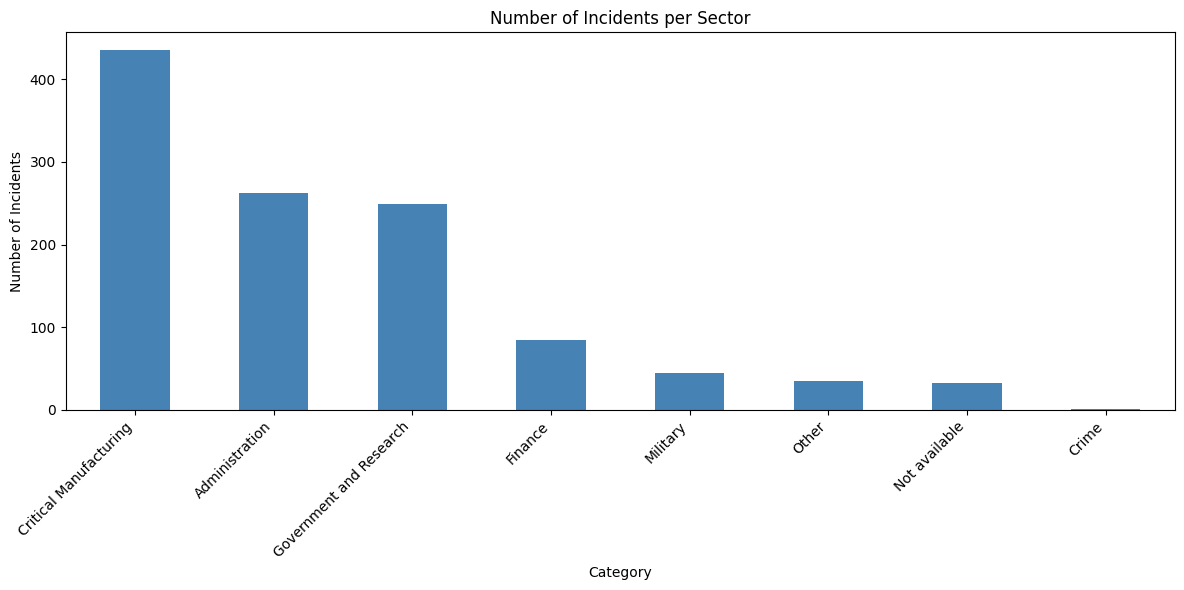

Number of incidents per category): Critical Manufacturing
Number of incidents: 435


In [74]:
sector_counts = df_threats_s["Category"].value_counts()

plt.figure(figsize=(12,6))
sector_counts.plot(kind="bar", color="steelblue")
plt.title("Number of Incidents per Sector")
plt.xlabel("Category")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print("Number of incidents per category:", sector_counts.idxmax())
print("Number of incidents:", sector_counts.max())
